## Requeriments

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import missingno as msno
from zipfile import ZipFile as zf
import random
#import sklearn.metrics       as Metrics

/pip_envs/Debuggers3.6/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Uploading data (input3 indexed)

In [2]:
df = pd.read_csv("/mnt/workstation/data/input_Pesos_Dic_20.csv")#, sep= ",", names =header)
df

,periodo,id_cli,fecha_nacimiento,edad,genero,estado_civil,nivel_academico,profesion,ocupacion,tipo_vivienda,...,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar
0,201908.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,1.0,0.0,319127.933029,C,0.0,NaN,1.284876e+06,NaN,2.380553e+05
1,201909.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,1.0,0.0,318417.111563,C,0.0,NaN,1.282014e+06,NaN,2.716166e+05
2,201907.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,1.0,0.0,318987.340975,C,0.0,NaN,1.285999e+06,NaN,2.490492e+05
3,201903.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,1.0,0.0,323130.849045,C,0.0,NaN,1.217153e+06,NaN,2.864983e+05
4,201911.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,0.0,0.0,690210.427661,C,0.0,NaN,1.278547e+06,NaN,4.267142e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255243,201910.0,2090044.0,19670629.0,52.0,F,DIVORCIADO,UNIVERSITARIO,DERECHO,Independiente,NaN,...,0.0,3.0,0.0,948228.792420,C,0.0,NaN,NaN,NaN,2.600541e+04
19255244,202002.0,2090044.0,19670629.0,53.0,F,DIVORCIADO,UNIVERSITARIO,DERECHO,Independiente,NaN,...,0.0,3.0,0.0,42015.094340,D,0.0,NaN,NaN,NaN,1.486611e+05
19255245,201903.0,2090044.0,19670629.0,52.0,F,DIVORCIADO,UNIVERSITARIO,DERECHO,Independiente,NaN,...,0.0,0.0,0.0,963768.746310,B,0.0,NaN,NaN,NaN,8.069678e+05
19255246,202001.0,2090044.0,19670629.0,52.0,F,DIVORCIADO,UNIVERSITARIO,DERECHO,Independiente,NaN,...,0.0,3.0,0.0,42297.237145,D,0.0,NaN,NaN,NaN,1.144466e+06


In [3]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
features_b = features[features['type'] == 'bool'].index

## Max

In [4]:
var_max = ['edad', 'mora_max', 'cant_moras_30_ult_12_meses',
       'cant_moras_60_ult_12_meses', 'cant_moras_90_ult_12_meses',]

In [5]:
df_edad = df.pivot_table('edad','id_cli', aggfunc={np.max})
df_edad.columns = ['edad']
df_edad.reset_index(inplace =True)
df_edad

,id_cli,edad
0,3.0,60.0
1,8.0,44.0
2,12.0,46.0
3,15.0,50.0
4,17.0,41.0
...,...,...
1047950,8704791.0,53.0
1047951,8704792.0,48.0
1047952,8704795.0,61.0
1047953,8704799.0,52.0


In [6]:
df_edad.iloc[:,1].value_counts()

31.0     37410
32.0     36957
30.0     36878
29.0     35974
34.0     34700
         ...  
110.0        5
119.0        2
120.0        1
116.0        1
5.0          1
Name: edad, Length: 89, dtype: int64

In [7]:
df_edad.loc[df_edad.query("edad < 15").index,'edad'] = 31
df_edad.iloc[:,1].value_counts()

31.0     37411
32.0     36957
30.0     36878
29.0     35974
34.0     34700
         ...  
101.0        9
110.0        5
119.0        2
120.0        1
116.0        1
Name: edad, Length: 88, dtype: int64

Text(0, 0.5, 'count')

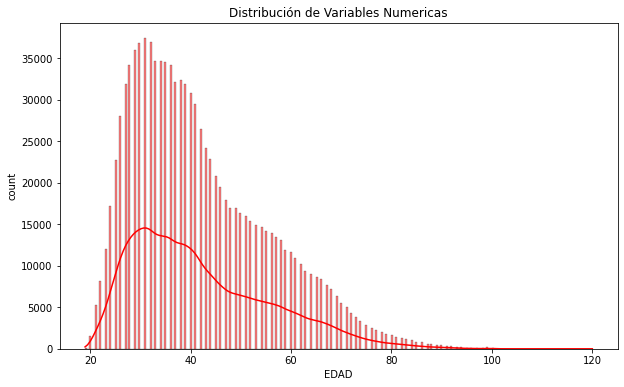

In [8]:
plt.figure(figsize=(10,6*1))
plt.title("Distribución de Variables Numericas")
#plt.subplot(1,2,i+1)
sns.histplot(df_edad['edad'], color='r', kde=True)
plt.xlabel('EDAD')
plt.ylabel("count")

In [9]:
df_mora_max = df.pivot_table('mora_max','id_cli', aggfunc={np.max})
df_mora_max.columns = ['mora_max']
df_mora_max.reset_index(inplace =True)
df_mora_max

,id_cli,mora_max
0,3.0,0.0
1,8.0,16.0
2,12.0,0.0
3,15.0,0.0
4,17.0,48.0
...,...,...
798731,8704791.0,1.0
798732,8704792.0,9.0
798733,8704795.0,0.0
798734,8704799.0,0.0


In [10]:
df_mora_max.iloc[:,1].value_counts()

0.0       370055
1.0       206901
28.0       26456
16.0       24061
15.0       21324
           ...  
1085.0         1
695.0          1
1089.0         1
700.0          1
1876.0         1
Name: mora_max, Length: 704, dtype: int64

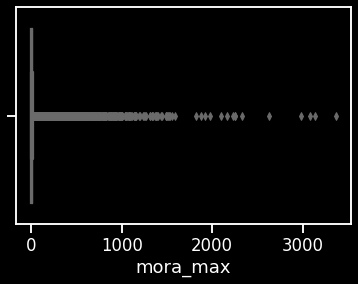

In [11]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
ax = sns.boxplot(x=df_mora_max['mora_max'])

In [12]:
df_cant_moras_30_ult_12_meses = df.pivot_table('cant_moras_30_ult_12_meses','id_cli', aggfunc={np.max})
df_cant_moras_30_ult_12_meses.columns = ['cant_moras_30_ult_12_meses']
df_cant_moras_30_ult_12_meses.reset_index(inplace =True)
df_cant_moras_30_ult_12_meses

,id_cli,cant_moras_30_ult_12_meses
0,3.0,0.0
1,8.0,0.0
2,12.0,0.0
3,15.0,0.0
4,17.0,1.0
...,...,...
798731,8704791.0,0.0
798732,8704792.0,0.0
798733,8704795.0,0.0
798734,8704799.0,0.0


In [13]:
df_cant_moras_30_ult_12_meses.iloc[:,1].value_counts()

0.0     744227
1.0      25665
2.0      11758
3.0       4839
4.0       2977
5.0       2177
7.0       1739
6.0       1561
8.0       1145
9.0        874
12.0       723
10.0       669
11.0       382
Name: cant_moras_30_ult_12_meses, dtype: int64

In [14]:
df_cant_moras_60_ult_12_meses = df.pivot_table('cant_moras_60_ult_12_meses','id_cli', aggfunc={np.max})
df_cant_moras_60_ult_12_meses.columns = ['cant_moras_60_ult_12_meses']
df_cant_moras_60_ult_12_meses.reset_index(inplace =True)
df_cant_moras_60_ult_12_meses

,id_cli,cant_moras_60_ult_12_meses
0,3.0,0.0
1,8.0,0.0
2,12.0,0.0
3,15.0,0.0
4,17.0,0.0
...,...,...
798731,8704791.0,0.0
798732,8704792.0,0.0
798733,8704795.0,0.0
798734,8704799.0,0.0


In [15]:
df_cant_moras_60_ult_12_meses.iloc[:,1].value_counts()

0.0     775031
1.0       9685
2.0       3765
3.0       2333
6.0       1778
4.0       1663
5.0       1312
7.0       1000
8.0        678
9.0        483
12.0       443
10.0       334
11.0       231
Name: cant_moras_60_ult_12_meses, dtype: int64

In [16]:
df_cant_moras_90_ult_12_meses = df.pivot_table('cant_moras_90_ult_12_meses','id_cli', aggfunc={np.max})
df_cant_moras_90_ult_12_meses.columns = ['cant_moras_90_ult_12_meses']
df_cant_moras_90_ult_12_meses.reset_index(inplace =True)
df_cant_moras_90_ult_12_meses

,id_cli,cant_moras_90_ult_12_meses
0,3.0,0.0
1,8.0,0.0
2,12.0,0.0
3,15.0,0.0
4,17.0,0.0
...,...,...
798731,8704791.0,0.0
798732,8704792.0,0.0
798733,8704795.0,0.0
798734,8704799.0,0.0


In [17]:
df_cant_moras_90_ult_12_meses.iloc[:,1].value_counts()

0.0     785451
1.0       3447
2.0       2122
5.0       2051
3.0       1556
4.0       1189
6.0        991
7.0        603
8.0        403
12.0       263
9.0        254
10.0       236
11.0       170
Name: cant_moras_90_ult_12_meses, dtype: int64

# Más recientes

In [18]:
var_mr = ['codigo_ciiu', 'ctas_activas', 'ctas_embargadas', 'mediana_nom3']

In [19]:
df_sorted = df.sort_values(by='periodo', ascending=False)
df_sorted.drop_duplicates(subset='id_cli', inplace = True)
df_sorted

,periodo,id_cli,fecha_nacimiento,edad,genero,estado_civil,nivel_academico,profesion,ocupacion,tipo_vivienda,...,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar
13761483,202011.0,1731361.0,19600420.0,61.0,M,CASADO,BACHILLER,NaN,Empleado,PROPIA,...,0.000000e+00,NaN,NaN,4.257430e+06,D,NaN,NaN,NaN,8.312683e+05,1.440884e+06
17753568,202011.0,2432854.0,19910913.0,29.0,M,SOLTERO,UNIVERSITARIO,INGENIERIA MECANICA,Empleado,NaN,...,0.000000e+00,5.0,0.0,1.562059e+06,A,0.0,NaN,NaN,NaN,8.779504e+05
4979696,202011.0,302663.0,19800311.0,41.0,M,SOLTERO,TECNOLOGO,OTROS,Empleado,FAMILIAR,...,0.000000e+00,1.0,0.0,1.034172e+06,C,0.0,NaN,NaN,NaN,1.384228e+06
3517299,202011.0,3623586.0,19901120.0,30.0,F,SOLTERO,ESPECIALIZACION,INGENIERIA INDUSTRIAL,Empleado,NaN,...,0.000000e+00,0.0,0.0,6.037822e+05,A,0.0,NaN,NaN,NaN,3.385097e+05
1244617,202011.0,1355903.0,19770314.0,44.0,F,DIVORCIADO,TECNOLOGO,TECNOLOGIA EN ADMINISTRACION,Empleado,FAMILIAR,...,0.000000e+00,NaN,NaN,7.014953e+06,F,NaN,NaN,NaN,NaN,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560970,201902.0,8155191.0,19600327.0,59.0,F,CASADO,UNIVERSITARIO,ECONOMIA,Empleado,PROPIA,...,0.000000e+00,0.0,0.0,1.174495e+06,A,0.0,NaN,NaN,NaN,0.000000e+00
10751979,201902.0,4739252.0,19670412.0,52.0,F,DIVORCIADO,UNIVERSITARIO,OTROS,Empleado,NaN,...,0.000000e+00,NaN,NaN,3.677414e+05,C,0.0,NaN,NaN,NaN,2.888435e+06
10743048,201902.0,564248.0,19800913.0,38.0,F,CASADO,ESPECIALIZACION,OTROS,Empleado,ALQUILADA,...,1.000799e+06,7.0,0.0,-5.234657e+06,A,0.0,70337.0,3.744512e+06,NaN,6.745922e+06
16144661,201902.0,3268329.0,19930506.0,26.0,M,SOLTERO,BACHILLER,ADMINISTRACION,Empleado,FAMILIAR,...,2.595821e+05,5.0,0.0,1.648938e+06,E,0.0,78748.0,7.766614e+06,3.127496e+06,1.909256e+06


# Promedio

In [20]:
var_mean = ['cupo_total_tc']

In [21]:
df_cupo_total_tc = df.pivot_table('cupo_total_tc','id_cli', aggfunc={np.mean})
df_cupo_total_tc.columns = ['cupo_total_tc']
df_cupo_total_tc.reset_index(inplace =True)
df_cupo_total_tc

,id_cli,cupo_total_tc
0,3.0,6.794096e+06
1,8.0,6.423008e+06
2,12.0,0.000000e+00
3,15.0,8.119999e+05
4,17.0,5.480999e+06
...,...,...
1047950,8704791.0,0.000000e+00
1047951,8704792.0,0.000000e+00
1047952,8704795.0,1.319500e+06
1047953,8704799.0,0.000000e+00


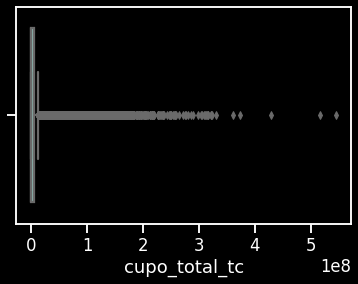

In [22]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
ax = sns.boxplot(x=df_cupo_total_tc['cupo_total_tc'])

## Merge

In [23]:
topten =  pd.DataFrame(df['id_cli'].drop_duplicates())
topten.shape

(1047955, 1)

In [24]:
topten = topten.merge(df_edad, on="id_cli", how='left')
topten.shape

(1047955, 2)

In [25]:
topten = topten.merge(df_mora_max, on="id_cli", how='left')
topten.shape

(1047955, 3)

In [26]:
topten = topten.merge(df_cant_moras_30_ult_12_meses, on="id_cli", how='left')
topten.shape

(1047955, 4)

In [27]:
topten = topten.merge(df_cant_moras_60_ult_12_meses, on="id_cli", how='left')
topten.shape

(1047955, 5)

In [28]:
topten = topten.merge(df_cant_moras_30_ult_12_meses, on="id_cli", how='left')
topten.shape

(1047955, 6)

In [29]:
topten = topten.merge(df_cupo_total_tc, on="id_cli", how='left')
topten.shape

(1047955, 7)

In [30]:
for i in var_mr:
    topten = topten.merge(df_sorted[['id_cli',i]], on="id_cli", how='left')
    print(i, topten.shape)

codigo_ciiu (1047955, 8)
ctas_activas (1047955, 9)
ctas_embargadas (1047955, 10)
mediana_nom3 (1047955, 11)


In [31]:
for i in features_o:
    topten = topten.merge(df_sorted[['id_cli',i]], on="id_cli", how='left')
    print(i, topten.shape)

genero (1047955, 12)
estado_civil (1047955, 13)
nivel_academico (1047955, 14)
profesion (1047955, 15)
ocupacion (1047955, 16)
tipo_vivienda (1047955, 17)
ciudad_residencia (1047955, 18)
departamento_residencia (1047955, 19)
ciudad_laboral (1047955, 20)
departamento_laboral (1047955, 21)
rechazo_credito (1047955, 22)
cat_ingreso (1047955, 23)
rep_calif_cred (1047955, 24)


In [32]:
for i in features_b:
    topten = topten.merge(df_sorted[['id_cli',i]], on="id_cli", how='left')
    print(i, topten.shape)

ind_mora_vigente (1047955, 25)
cartera_castigada (1047955, 26)
tenencia_tc (1047955, 27)
tiene_consumo (1047955, 28)
tiene_crediagil (1047955, 29)
tiene_ctas_activas (1047955, 30)
tiene_ctas_embargadas (1047955, 31)
pension_fopep (1047955, 32)
tiene_cred_hipo_1 (1047955, 33)
tiene_cred_hipo_2 (1047955, 34)


Text(190.5, 0.5, 'Filas')

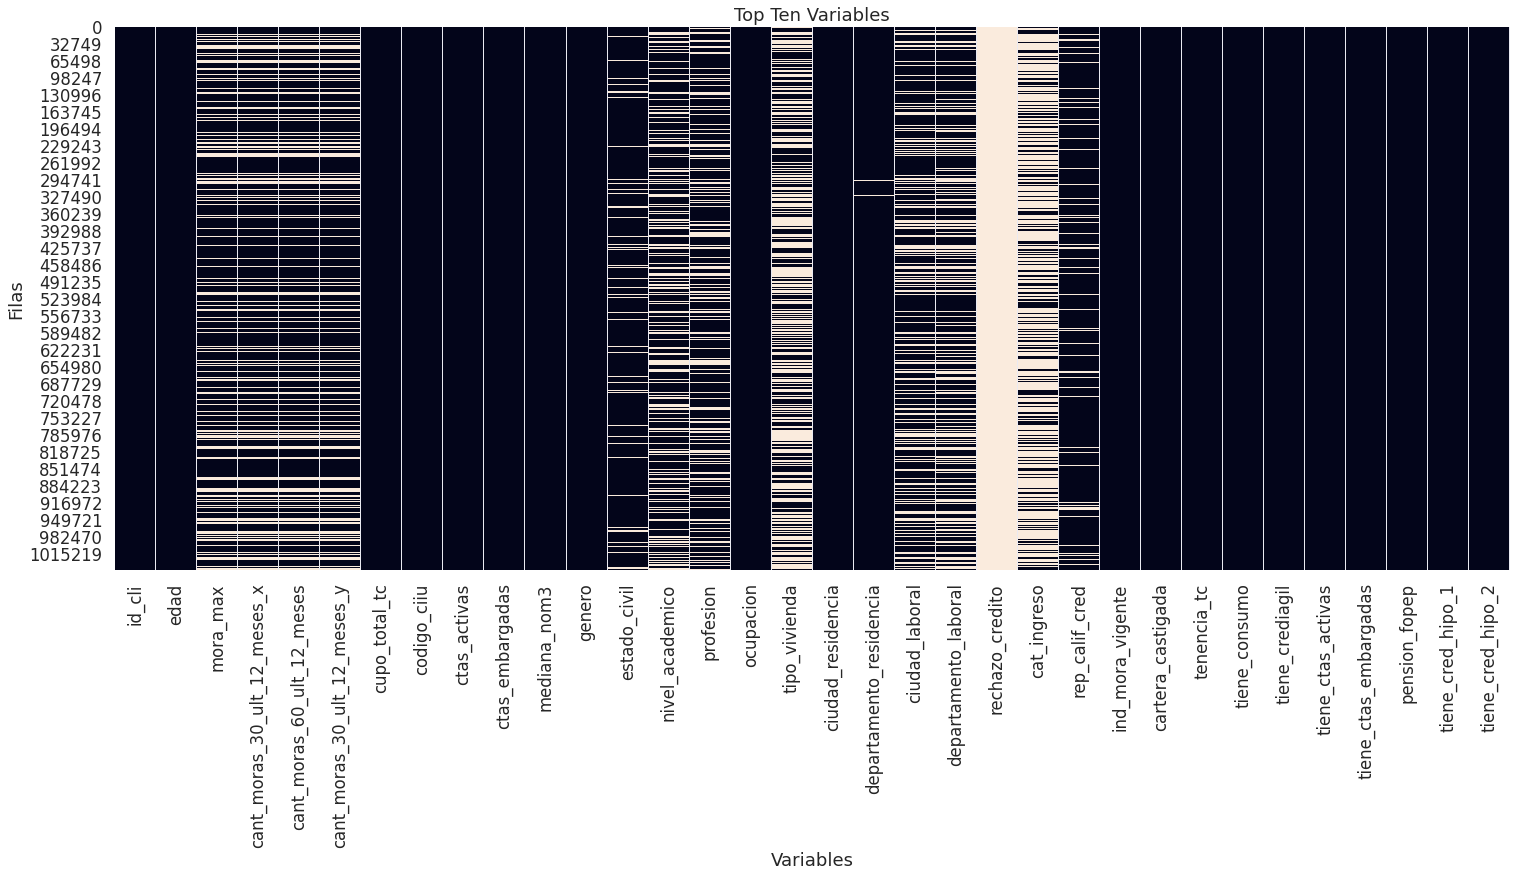

In [33]:
sns.set_style('darkgrid')
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(25,10))
sns.heatmap(topten.isnull(), cbar=False)
plt.title("Top Ten Variables")
plt.xlabel('Variables')
plt.ylabel('Filas')

In [34]:
100*topten.isnull().sum()/topten.shape[0]

id_cli                           0.000000
edad                             0.000000
mora_max                        23.781460
cant_moras_30_ult_12_meses_x    23.781460
cant_moras_60_ult_12_meses      23.781460
cant_moras_30_ult_12_meses_y    23.781460
cupo_total_tc                    0.000000
codigo_ciiu                      0.000000
ctas_activas                     0.000095
ctas_embargadas                  0.000095
mediana_nom3                     0.000000
genero                           0.000000
estado_civil                     9.418725
nivel_academico                 30.038885
profesion                       28.774709
ocupacion                        0.304593
tipo_vivienda                   53.077279
ciudad_residencia                0.054869
departamento_residencia          0.415858
ciudad_laboral                  28.988745
departamento_laboral            31.762719
rechazo_credito                 99.708289
cat_ingreso                     61.649880
rep_calif_cred                   9

In [35]:
topten.to_csv("/mnt/workstation/data/Input_Topten.csv", index=False)